In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from LogisticGrowthModel import localLogisticGrowth
from matplotlib.patches import Circle


In [17]:

# FUNCTION DEFINITIONS
def generatePDFs(X,numberOfBins,binRange=None):
    if not binRange:
       binRange=(X.min(),X.max())
    bins             = np.linspace(*binRange,numberOfBins)
    binAssignments   = np.digitize(X,bins)
    prob = np.ones(shape=(X.shape[0],numberOfBins))
    for inx,popBinAssignment in enumerate(binAssignments):
        for binNumber in range(1,numberOfBins):
           prob[inx,binNumber] = np.sum(popBinAssignment==binNumber)/X.shape[1] 
    return prob
def generateJointPDF(xt,yt,NXbins,NYbins,XbinRange=None,YbinRange=None):
    if not XbinRange:
        XbinRange = (xt.min(),xt.max())
    if not YbinRange:
        YbinRange = (yt.min(),yt.max())
    xbins            = np.linspace(*XbinRange,NXbins+1)
    ybins            = np.linspace(*YbinRange,NYbins+1)
    xtBinAssignments = np.digitize(xt,xbins)
    ytBinAssignments = np.digitize(yt,ybins)
    jointPDF         = np.zeros((NXbins,NYbins))
    Xbins, Ybins     = np.meshgrid(np.arange(1,NXbins),np.arange(1,NXbins))
    for xi, yi in zip(xtBinAssignments,ytBinAssignments):
        Xbool = np.zeros(Xbins.shape);      Ybool = np.zeros(Ybins.shape); 
        Xbool[Xbins==xi]=1;                 Ybool[Ybins==yi]=1;
        jointPDF +=Xbool*Ybool
    jointPDF = jointPDF/len(xt)
    return jointPDF
    
def entropy(pdf,axis=1):
    with np.errstate(all='ignore'):
        return -1.0*np.sum(np.nan_to_num(pdf*np.log2(pdf)),axis=axis)

In [19]:
import pandas as pd
uskor = pd.read_csv("us_kor_effective_reproductive_rate.csv")
usgbr = pd.read_csv("us_gbr_effective_reproductive_rate.csv")

In [59]:
uskor = uskor.rename(columns={"USA_RR":"USA1_RR"})
X = pd.concat([usgbr['USA_RR'], usgbr['GBR_RR'], uskor['USA1_RR'], uskor['KOR_RR'] ], axis=1, join="inner")

#Normalize
X=(X-X.min())/(X.max()-X.min())

print(X.describe())
#Bin 
#bins = np.arange(0.0, 1.05, 0.05)
#labels = range(1,21,1)
#X['USA_RR'] = pd.cut(X['USA_RR'], bins,labels=labels)
#X['USA1_RR'] = pd.cut(X['USA1_RR'], bins,labels=labels)
#X['GBR_RR'] = pd.cut(X['GBR_RR'], bins,labels=labels)
#X['KOR_RR'] = pd.cut(X['KOR_RR'], bins,labels=labels)

print(X.describe())
print(X.head())
X = X.T
X = X.to_numpy()



           USA_RR      GBR_RR     USA1_RR      KOR_RR
count  710.000000  710.000000  710.000000  710.000000
mean     0.180400    0.186904    0.180400    0.295809
std      0.147007    0.153057    0.147007    0.108758
min      0.000000    0.000000    0.000000    0.000000
25%      0.109677    0.086538    0.109677    0.242215
50%      0.148387    0.163462    0.148387    0.287197
75%      0.193548    0.254808    0.193548    0.339100
max      1.000000    1.000000    1.000000    1.000000
           USA_RR      GBR_RR     USA1_RR      KOR_RR
count  710.000000  710.000000  710.000000  710.000000
mean     0.180400    0.186904    0.180400    0.295809
std      0.147007    0.153057    0.147007    0.108758
min      0.000000    0.000000    0.000000    0.000000
25%      0.109677    0.086538    0.109677    0.242215
50%      0.148387    0.163462    0.148387    0.287197
75%      0.193548    0.254808    0.193548    0.339100
max      1.000000    1.000000    1.000000    1.000000
     USA_RR    GBR_RR   USA1

In [60]:
X

array([[0.98709677, 0.96774194, 0.97419355, ..., 0.00322581, 0.00645161,
        0.00967742],
       [0.8125    , 0.83653846, 0.86057692, ..., 0.08173077, 0.07211538,
        0.07211538],
       [0.98709677, 0.96774194, 0.97419355, ..., 0.00322581, 0.00645161,
        0.00967742],
       [0.29411765, 0.23183391, 0.15916955, ..., 0.47750865, 0.4567474 ,
        0.44982699]])

In [62]:
numberOfBins    = 20
binRange        = (0.0,1.00)
bins            = np.linspace(*binRange,numberOfBins)
binAssignments  = np.digitize(X,bins)
N = 150 

fullTimeSeries_pdfs  = generatePDFs(X,numberOfBins,binRange)
firstNtimesteps_pdfs = generatePDFs(X[:,:N],numberOfBins,binRange)
lastNtimesteps_pdfs  = generatePDFs(X[:,-N:],numberOfBins,binRange)
print("Shannon entropies:")
print(entropy(fullTimeSeries_pdfs))
HofFirstN  = entropy(firstNtimesteps_pdfs)
HofLastN   = entropy(lastNtimesteps_pdfs)
print(HofFirstN)
print(HofLastN)

#%% Save Datae to text for calculations
np.savetxt('CalebfullTimeSeries.txt',binAssignments.T,fmt='%d')    
np.savetxt('CalebfirstNtimesteps.txt',binAssignments[:,:N].T,fmt='%d')    
np.savetxt('CaleblastNtimesteps.txt',binAssignments[:,-N:].T,fmt='%d')    



Shannon entropies:
[2.53482885 3.04455365 2.53482885 2.86661948]
[2.51912508 3.15469244 2.51912508 3.0843126 ]
[2.53309259 2.24890201 2.53309259 2.70332914]


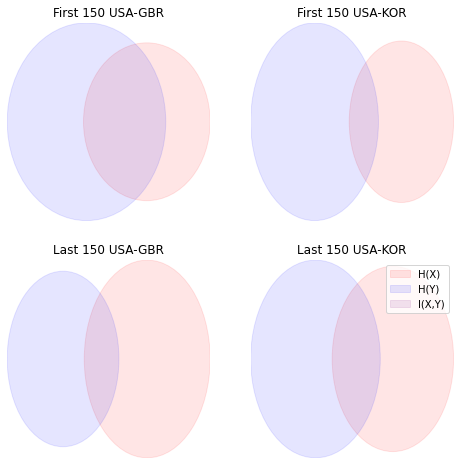

In [65]:
#MI_Discrete(col_0 -> col_1) = 1.6367 bits #FirstN GBR
#MI_Discrete(col_0 -> col_1) = 0.7058 bits #FirstN KOR
#MI_Discrete(col_0 -> col_1) = 0.6976 bits #LastN GBR
#MI_Discrete(col_0 -> col_1) = 1.0032 bits #LastN KOR
#%% Make Venn diagram
# Inputs       First 150 time steps          middle 150 time steps
#      Non-Chaotic(GBR)   Chaotic(KOR)   Non-Chaotic(GBR) Chaotic(KOR)          
Xentropies = [HofFirstN[0], HofFirstN[2], HofLastN[0], HofLastN[2]]  
Yentropies = [HofFirstN[1], HofFirstN[3], HofLastN[1], HofLastN[3]]  
mutualInfo = [1.6367,       0.7058,      0.6976,         1.0032]
titles=['First {} USA-GBR','First {} USA-KOR',
        'Last {} USA-GBR', 'Last {} USA-KOR']
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(8,8)) 

for ax,hx,hy,mi,ti in zip(np.ravel(axarr),Xentropies,Yentropies,mutualInfo,titles):
    
    venX = Circle((hx/2-mi/2,0),hx/2, 
                  alpha =0.1, color ='red', label='H(X)')
    venY = Circle((-hy/2+mi/2,0),hy/2, 
                  alpha =0.1, color ='blue', label='H(Y)')
    mutI = Circle((0,0),1,alpha =0.1, color='purple',label='I(X,Y)')
    ax.add_artist(venX);    ax.add_artist(venY);    #ax.text(0,0,'I(X;Y)')
    ax.set_title(ti.format(N))
    
    
    plt.legend(handles = [venX,venY,mutI])
    ax.set_xlim(-hy+mi/2,hx-mi/2)
    ax.set_ylim(max(hy,hx)/2,max(hy,hx)/-2)
    ax.axis('off')